# IoT Device-Type Identification Using Supervised Machine Learning

In [1]:
# Importing Relevant Packages
from warnings import simplefilter
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score,plot_confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

simplefilter(action='ignore', category=FutureWarning)

In [21]:
data = pd.read_csv('feature_extraction/IOT_label_feature.csv')
data.head()

,Label,IPLength,IPHeaderLength,TTL,Protocol,SourcePort,DestPort,SequenceNumber,AckNumber,WindowSize,TCPHeaderLength,TCPLength,TCPStream,TCPUrgentPointer,IPFlags,IPID,IPchecksum,TCPflags,TCPChecksum
0,D-LinkCam,60,20,64,6,42254,443,0,0,5840,40,0,0,0,0x40,0x0e39,0x8dab,0x0002,0x322e
1,D-LinkCam,60,20,41,6,443,42254,0,1,5792,40,0,0,0,0x40,0x0000,0xb2dc,0x0012,0x50a7
2,D-LinkCam,52,20,64,6,42254,443,1,1,2920,32,0,0,0,0x40,0x0e3a,0x8db2,0x0010,0x8a4c
3,D-LinkCam,179,20,64,6,42254,443,1,1,2920,32,127,0,0,0x40,0x0e3b,0x8d32,0x0018,0xde49
4,D-LinkCam,52,20,41,6,443,42254,1,128,12,32,0,0,0,0x40,0x5419,0x5ecb,0x0010,0x9509


In [3]:
data.shape

(57166, 19)

In [4]:
data.groupby('Label')['Label'].count()

Label
D-LinkCam             2075
D-LinkDoorSensor      3634
D-LinkHomeHub        12252
D-LinkSensor          9988
D-LinkSiren           9174
D-LinkSwitch         10783
D-LinkWaterSensor     9260
Name: Label, dtype: int64

In [5]:
data.columns

Index(['Label', 'IPLength', 'IPHeaderLength', 'TTL', '           Protocol',
       'SourcePort', 'DestPort', 'SequenceNumber', 'AckNumber           ',
       'WindowSize', 'TCPHeaderLength', 'TCPLength', 'TCPStream     ',
       'TCPUrgentPointer', 'IPFlags', 'IPID', 'IPchecksum', 'TCPflags',
       'TCPChecksum'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57166 entries, 0 to 57165
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Label                 57166 non-null  object
 1   IPLength              57166 non-null  int64 
 2   IPHeaderLength        57166 non-null  int64 
 3   TTL                   57166 non-null  int64 
 4              Protocol   57166 non-null  int64 
 5   SourcePort            57166 non-null  int64 
 6   DestPort              57166 non-null  int64 
 7   SequenceNumber        57166 non-null  int64 
 8   AckNumber             57166 non-null  int64 
 9   WindowSize            57166 non-null  int64 
 10  TCPHeaderLength       57166 non-null  int64 
 11  TCPLength             57166 non-null  int64 
 12  TCPStream             57166 non-null  int64 
 13  TCPUrgentPointer      57166 non-null  int64 
 14  IPFlags               57166 non-null  object
 15  IPID                  57166 non-null

In [7]:
feature=data.iloc[:,1:]
target= data.iloc[:,0]

In [8]:
#coverting hexadecimal values to decimal
for c in range(-5,0):
    strcol = feature.iloc[:,c].apply(str)
    intcol = strcol.apply(int, base=16)
    feature.iloc[:,c] = intcol

In [9]:
feature.head()

,IPLength,IPHeaderLength,TTL,Protocol,SourcePort,DestPort,SequenceNumber,AckNumber,WindowSize,TCPHeaderLength,TCPLength,TCPStream,TCPUrgentPointer,IPFlags,IPID,IPchecksum,TCPflags,TCPChecksum
0,60,20,64,6,42254,443,0,0,5840,40,0,0,0,64,3641,36267,2,12846
1,60,20,41,6,443,42254,0,1,5792,40,0,0,0,64,0,45788,18,20647
2,52,20,64,6,42254,443,1,1,2920,32,0,0,0,64,3642,36274,16,35404
3,179,20,64,6,42254,443,1,1,2920,32,127,0,0,64,3643,36146,24,56905
4,52,20,41,6,443,42254,1,128,12,32,0,0,0,64,21529,24267,16,38153


In [10]:
#LabelEncoder can transform non-numerical labels to numerical labels.
labels = LabelEncoder().fit_transform(target)
#StandardScaler can standardize the features by removing the mean and scaling to unit variance.
feature_std = StandardScaler().fit_transform(feature)
x_train, x_test, y_train, y_test = train_test_split(feature_std, labels, test_size=0.25, random_state=0)


In [11]:
def print_stats_metrics(model,x_test,y_test, y_pred):    
    print('Accuracy: %.3f' % accuracy_score(y_test,y_pred) )
    plot_confusion_matrix(model,x_test,y_test)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='weighted'))


#Logistic Regression#


C:\Users\AK Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.327
Precision: 0.315
Recall: 0.327
F1-measure: 0.309


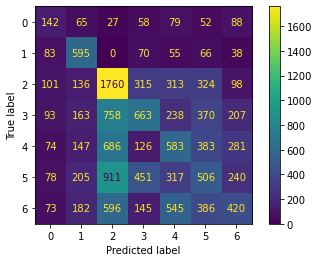

In [22]:
print("#Logistic Regression#")
clfLog = LogisticRegression(multi_class='multinomial')
clfLog.fit(x_train,y_train)
predictions = clfLog.predict(x_test)
print_stats_metrics(clfLog,x_test,y_test, predictions)

#Random Forest#
Accuracy: 0.954
Precision: 0.954
Recall: 0.954
F1-measure: 0.954


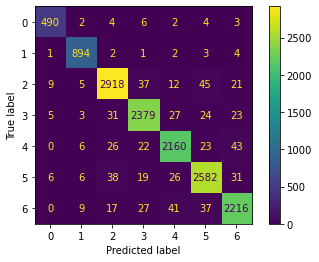

In [27]:
print("#Random Forest#")
clfRandForest = RandomForestClassifier()
clfRandForest.fit(x_train,y_train)
predictions = clfRandForest.predict(x_test)
print_stats_metrics(clfRandForest,x_test,y_test, predictions)

##Decision Tree#
Accuracy: 0.960
Precision: 0.960
Recall: 0.960
F1-measure: 0.960


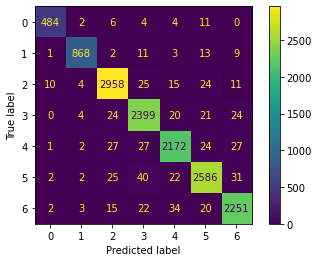

In [28]:
print("##Decision Tree#")
clfDT = DecisionTreeClassifier()
clfDT.fit(x_train,y_train)
predictions = clfDT.predict(x_test)
print_stats_metrics(clfDT,x_test,y_test, predictions)

#Naive Bayes#
Accuracy: 0.257
Precision: 0.382
Recall: 0.257
F1-measure: 0.278


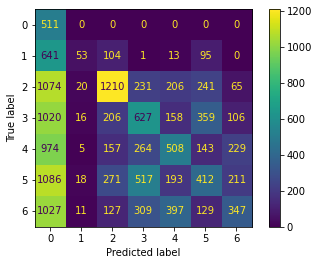

In [29]:
print("#Naive Bayes#")
clfNB = GaussianNB()
clfNB.fit(x_train,y_train)
predictions = clfNB.predict(x_test)
print_stats_metrics(clfNB,x_test,y_test, predictions)

# ---------------------------------------------------------------------------------------------------